# ✈️ Phase 1 Project - Aircraft Risk Assessment for Business Expansion

* Student name: Patrick Maina
* Student pace: DSF-FT12
* Scheduled project review date/time: Friday, 28th March, 2025
* Instructor name: Nikita Njoroge

## Project Overview
### Problem Statement
As part of its quest to expand its business, my company is venturing into the aviation industry to operate both commercial and private aircrafts. However, one crucial challenge is the assessing of potential risks associated with different aircraft models and makes.

Therefore, to ensure a data-driven decision making process, this project aims to analyze historical aviation incident data to identify aircrafts with the lowest risk profile. By leveraging Data Science techniques such as data cleaning, exploratory data analysis (EDA), and visualization, we will uncover trends in aircraft safety, manufacturers' reliability, and key risk factors influencing aviation incidents.

### Data Understanding
The [Aviation Accident Database & Synopses](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?select=AviationData.csv) dataset from kaggle contains historical aviation incident records, including information on aircrafts, accident severity, causes, locations and weather conditions. The data also provides valuable insights into aviation safety trends and risk factors associated with different aircraft models and manufacturers.
The dataset contains two data files:
1. `AviationData.csv`: Contains detailed information on each aviation incident, including aircraft details, operational and environmental factors, and regulatory information.
2. `USState_Codes.csv`: Contains US states, as well as their abbreviations.

#### Key features of the Dataset:
- __Accident/Incident Details:__
    - Date and Time of the incident
    - Location: City, State, and Country where the event took place
    - Accident severity: Categorization of the event, which may include classifications such as fatal, non-fatal or minor incidents
    - Injury Count: Number of people affected, including fatalities and serious injuries.
- __Aircraft Information:__
    - Type of Aircraft: Specifies whether the aircraft was used for commercial, private, cargo or military purposes
    - Manufacturer and Model: Identifies the Aircraft's manufacturer (e.g., Boeing, Airbus, Cesna) and the specific model involved in the incident.
    - Number of Engines and Engine Type: Distinguishes between single-engine, twin-engine, and jet-powered aircraft, which may affect accidental patterns.
    - Year of Manufacture: The production year of the aircraft, which could indicate whether older aircrafts are more prone to incidents.
- __Operational and Environmental Factors__:
    - Phase of flight: Indicates whether the incident occured during takeoff, cruising, landing, taxiing, or another flight phase.
    - Weather conditions: Records if adverse weather condtions played a role in the incident, such as storms, fog, or strong winds
    - Pilot Experience and Crew Information: May include details on pilot certifications and experience levels, which can be crucial in determining human error risks.
- __Regulatory Information:__
    - Federal Aviation Regulations (FAR): Specifies the legal framework under which the aircraft was operating(e.g., commercial airline, private charter, training flight)
    - NTSB (National Transportation Safety Board) report status: Indicates whether the incident has been officially investigated, and if a final report is available.

The goal of analyzing this dataset is to identify aircraft models with the lowest risk by examining historical incident trends. This analysis will help the company make informed decisions on the aircraft to purchase, ensuring safety and operational efficiency in its new aviation division.

### Key questions to cosider:
1. __Aircraft Safety and Risk Analysis:__
   - Which aircraft models have the lowest risk of accidents?
   - Are there certain type of accidents that are more prone to accidents?
   - Does the age of an aircraft influence its chances of getting involved in an accident?
   - What is the distribution of incident severity (fatal vs non-fatal) across different aircraft models?
2. __Common causes of Aviation incidents:__
   - What are te most common causes of accidents (e.g., mechanical failure, pilot error, weather conditions, etc)?
   - How often do human factors (e.g., pilot inexperience, miscommunication) lead to accidents?
   - Do single-engine aircrafts experience more incidents than multi-engine or jet-powered aircrafts?
3. __Environmental & Operational Factors:__
   - During which phase of flight (Takeoff, Cruising, Landing) do most incidents occur?
   - Do certain weather conditions (e.g, storms, fog) correlate with a higher accident rate?
   - Are there any specific geographic regions/airports with a higher number of incidents?
4. __Temporal Trends & Patterns:__
   - What has been the trend of aviation incidents over time?
   - Are accidents more common during specific months or seasons?
   - Are newer aircraft models (manufactured in recent years) safer compared to older ones?
5. __Business Decision-Making:__
   - Based on the analysis, which aircraft models should the company consider purchasing to minimize risk?
   - What are the best-performing manufacturers in terms of safety and reliability?
   - How can the organization leverage these insights to improve operational safety and mitigate risks?

### Data Methodology
To analyze the aviation incident data, I will follow these steps:
1. __Data Extraction:__ Download the Aviation dataset from Kaggle, load it into a pandas DataFrame and obtain the general information of the dataset.
2. __Data Cleaning:__ Remove any missing values or irrelevant data points.
3. __Exploratory Data Analysis (EDA):__ Perform data visualization and statistical analysis to understand the distribution of incidents, risk factors, and trends in the dataset.

### Expected outcomes:
By exploring and analyzing the Aviation dataset, I will be able to:
- Identify aircraft models with the lowest risk of accidents.
- Obtain insights into the most common causes of aviation incidents
- Provide recommendations to help the company's Aviation division in minimizing risks and making informed investment decisions.

Now that we have a full understanding of the project and the data, we can dive into the code!🚀

In [38]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the Aviation dataset and display first 5 rows
aviation_df = pd.read_csv("data/AviationData.csv", encoding="latin1", low_memory=False)
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


From the head() function, we can see that the dataset contains 31 columns, with key columns such as `Event Date`, `Location`, `Make`, `Model`, etc.

In [40]:
# Check the shape of the dataset
print(f"The dataset has {aviation_df.shape[0]} rows")
print(f"The dataset has {aviation_df.shape[1]} columns")

The dataset has 88889 rows
The dataset has 31 columns


This dataset contains a total of `88889` rows and `31` columns. Next, we get the overall info of the dataset.

In [41]:
# Get the info of the data
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The `info()` function gives us a comprehensive summary of the dataset, including the total number of entries, the data types of each column `(object, float64)`, and the number of entries in each column. We can see that some columns don't have the full number of entries, implying that they may be having some missing values.

In [42]:
# Load the US State Codes dataset and display the first 5 rows
us_codes_df = pd.read_csv('data/USState_Codes.csv', encoding='latin1')
us_codes_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [43]:
# Get the info of the data
us_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


Since the US State dataset only provides the state and its abbreviation, it is not very relevant in our analysis, and therefore will not be implemented. 

In [44]:
# Get the summary statistics for the dataset
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The `describe()` function gives a sumamry of the statistics of the dataset, including:
- __Count:__ Total number of entries
- __Mean:__ Average value
- __Std:__ Standard deviation
- __Min:__ Minimum value
- __25th percentile:__ 25th percentile value
- __50th percentile:__ 50th percentile value (median)
- __75th percentile:__ 75th percentile value
- __Max:__ Maximum value

In [45]:
# Check the columns for the Aviation dataset
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

The `columns` method gives all the columns present in the dataset.

In [46]:
# Check for duplicate values
aviation_df.duplicated().sum()

0

The dataset doesn't have any duplicate entries.

Now, let's check for null values in the Aviation dataset. We'll use the `isnull().sum()` function to count the number of null values in each column.


In [47]:
# Check for null values in the Aviation dataset as a percentage for each column
null_percentage = (aviation_df.isnull().sum() / len(aviation_df)) * 100

# Display the columns with missing values, and their percentages in descending order
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)
print(null_percentage)

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
dtype: float64


Some columns in the dataset have a high percentage of missing values. Therefore, I will use a threshold of 50% to ddrop columns with excessive missing values.

In [48]:
# Define a threshold
drop_threshold = 50
columns_to_drop = null_percentage[null_percentage > drop_threshold].index

# Drop the columns exceeding the threshold
aviation_df_clean = aviation_df.drop(columns=columns_to_drop)

# Display number of columns dropped
print(f"Dropped {len(columns_to_drop)} columns with more than {drop_threshold}% missing values")

# Display first 5 rows of data
aviation_df_clean.head()

Dropped 6 columns with more than 50% missing values


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


I have dropped 6 columns that had more than 50% of missing values.
Next, I will drop rows with missing critical values.

In [49]:
# Check the data info again
aviation_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50249 non-null  object 
 7   Airport.Name            52790 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Registration.Number     87572 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur.Built           88787 non-null  object 
 14  Number.of.Engines       82805 non-null

I have dropped a total of `6 columns` that had more than 50% of their data as missing values. Next, I will drop some rows for the columns with the least number of missing values.

In [50]:
# Drop rows from the columns with the least number of missing values
aviation_df_clean = aviation_df_clean.dropna(subset=['Make', 'Model', 'Amateur.Built', 'Location', 'Country'], axis=0)

# Display the first row of the cleaned data
aviation_df_clean.head(1)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN


In [51]:
# Check the info again
aviation_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88406 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88406 non-null  object 
 1   Investigation.Type      88406 non-null  object 
 2   Accident.Number         88406 non-null  object 
 3   Event.Date              88406 non-null  object 
 4   Location                88406 non-null  object 
 5   Country                 88406 non-null  object 
 6   Airport.Code            50135 non-null  object 
 7   Airport.Name            52655 non-null  object 
 8   Injury.Severity         87427 non-null  object 
 9   Aircraft.damage         85272 non-null  object 
 10  Registration.Number     87221 non-null  object 
 11  Make                    88406 non-null  object 
 12  Model                   88406 non-null  object 
 13  Amateur.Built           88406 non-null  object 
 14  Number.of.Engines       82493 non-null

The data now has a total of 25 columns, with some of the rows that had missing values being taken care of.

### Filling Missing values
Since our dataset has two types of columns `(numerical and categorical)`, we need to devise a method to fill the missing values for each type of column.
 - For numerical columns, we can use the `mean` or `median` to fill in the missing values
 - For categorical columns, we can use the `mode` or `Unknown` to fill in the missing values
Let's first start with the numerical columns:

In [52]:
# Filling numerical columns with the mean and median values
aviation_df_clean['Total.Fatal.Injuries'] = aviation_df_clean['Total.Fatal.Injuries'].fillna(aviation_df_clean['Total.Fatal.Injuries'].mean())
aviation_df_clean['Total.Serious.Injuries'] = aviation_df_clean['Total.Serious.Injuries'].fillna(aviation_df_clean['Total.Serious.Injuries'].mean())
aviation_df_clean['Total.Minor.Injuries'] = aviation_df_clean['Total.Minor.Injuries'].fillna(aviation_df_clean['Total.Minor.Injuries'].mean())
aviation_df_clean['Total.Uninjured'] = aviation_df_clean['Total.Uninjured'].fillna(aviation_df_clean['Total.Uninjured'].mean())
aviation_df_clean['Number.of.Engines'] = aviation_df_clean['Number.of.Engines'].fillna(aviation_df_clean['Number.of.Engines'].median())

We can check the info of the cleaned dataset again just to make sure we have dealt with the numerical columns

In [53]:
aviation_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88406 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88406 non-null  object 
 1   Investigation.Type      88406 non-null  object 
 2   Accident.Number         88406 non-null  object 
 3   Event.Date              88406 non-null  object 
 4   Location                88406 non-null  object 
 5   Country                 88406 non-null  object 
 6   Airport.Code            50135 non-null  object 
 7   Airport.Name            52655 non-null  object 
 8   Injury.Severity         87427 non-null  object 
 9   Aircraft.damage         85272 non-null  object 
 10  Registration.Number     87221 non-null  object 
 11  Make                    88406 non-null  object 
 12  Model                   88406 non-null  object 
 13  Amateur.Built           88406 non-null  object 
 14  Number.of.Engines       88406 non-null

From the info() function, we have dealt with the numerical columns of the data type `float64` by filling in the missing values with the mean.

Next, we will deal with the categorical columns. But first, let's see all the categorical columns with missing values.

In [54]:
# Select only categorical columns
categorical_cols = aviation_df_clean.select_dtypes(include=['object'])

# Check for null values in the Categorical columns as a percentage
categorical_null = (categorical_cols.isnull().sum() / len(aviation_df)) * 100

# Display the categorical columns with missing values, and their percentages in descending order
categorical_null = categorical_null[categorical_null > 0].sort_values(ascending=False)
print(categorical_null)

Airport.Code             43.054821
Airport.Name             40.219825
Broad.phase.of.flight    30.341212
Publication.Date         15.396731
Engine.Type               7.786115
Report.Status             7.126866
Purpose.of.flight         6.817491
Weather.Condition         4.921869
Aircraft.damage           3.525746
Registration.Number       1.333123
Injury.Severity           1.101374
dtype: float64


Now that we know all the categorical columns with missing values, it's time to deal with them.

We will fill the categorical columns with two approaches:
 1. Fill the columns with missing values that account for less than `10%` with __Mode__
 2. Fill the columns with missing values that account for between `10%` and `30%` with __"Unknown"__
 3. Fill the columns with missing values that account for more than `30%` with __Forward fill (ffill)__ or __Backward fill (bfill)__ 

In [55]:
# Create a for loop that will loop through the categorical cols with missing values
for col in categorical_null.index:
    # Calculate the percentage of missing values in the current column
    missing_percentage = (aviation_df_clean[col].isnull().sum() / len(aviation_df_clean)) * 100
    
    # Check if the missing percentage is less than 10%
    if missing_percentage < 10:
        # Fill the missing values with the mode of the column
        aviation_df_clean[col] = aviation_df_clean[col].fillna(aviation_df_clean[col].mode()[0])

    # Check if the missing percentage is between 10% and 30%
    elif missing_percentage >= 10 and missing_percentage < 30:
        # Fill the missing values with "Unknown"
        aviation_df_clean[col] = aviation_df_clean[col].fillna("Unknown")

    # Check if the missing percentage is more than 30%
    else:
        # Fill the missing values with forward fill
        aviation_df_clean[col] = aviation_df_clean[col].fillna(method='ffill')

        # Fill the missing values with backward fill
        aviation_df_clean[col] = aviation_df_clean[col].fillna(method='bfill')

# Check for missing values again
print("Missing values after filling:")
print(aviation_df_clean.isnull().sum())

Missing values after filling:
Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


We have successfully dealt with the missing values in our dataset. Just to be sure, we can run the info() again.

In [56]:
aviation_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88406 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88406 non-null  object 
 1   Investigation.Type      88406 non-null  object 
 2   Accident.Number         88406 non-null  object 
 3   Event.Date              88406 non-null  object 
 4   Location                88406 non-null  object 
 5   Country                 88406 non-null  object 
 6   Airport.Code            88406 non-null  object 
 7   Airport.Name            88406 non-null  object 
 8   Injury.Severity         88406 non-null  object 
 9   Aircraft.damage         88406 non-null  object 
 10  Registration.Number     88406 non-null  object 
 11  Make                    88406 non-null  object 
 12  Model                   88406 non-null  object 
 13  Amateur.Built           88406 non-null  object 
 14  Number.of.Engines       88406 non-null

Next, we want to standardize the columns so that they can have the same naming format. This will help with readability of the columns, and ensure uniformity in our dataset. We will do this in three fold:
 1. Strip any leading or trailing whitespaces
 2. Convert all column names to titles
 3. Replace the `.` character with `_` character

First, we will check all the columns we have.

In [57]:
# Check the remaining columns in our dataset
aviation_df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

Now we can do the standardization of the columns.

In [58]:
# # Standardizing column names
aviation_df_clean.columns = (
    aviation_df_clean.columns
    .str.replace('.', '_', regex=True)  # Replace '.' with '_'
    .str.replace(' ', '_', regex=True)  # Replace spaces with '_'
    .str.strip()  # Remove leading/trailing spaces
    .str.title() # Capitalizes the first letter of each word
)

# Display updated column names
aviation_df_clean.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Airport_Code', 'Airport_Name',
       'Injury_Severity', 'Aircraft_Damage', 'Registration_Number', 'Make',
       'Model', 'Amateur_Built', 'Number_Of_Engines', 'Engine_Type',
       'Purpose_Of_Flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_Phase_Of_Flight', 'Report_Status', 'Publication_Date'],
      dtype='object')

This ensures that the column names follow the same naming conventions.

Looking into the columns, we can convert the data in the `Event_Date` column to the correct format, because it is currently an object data type. To do the conversion, we use the `pd.to_datetime()` function.

In [59]:
# Convert Event_Date to Datetime format
aviation_df_clean['Event_Date'] = pd.to_datetime(aviation_df_clean['Event_Date'], errors='coerce') # the errors method converts invalid values to NaT (Not a Time) instead of raising an error

# Check if all the values in the column have been correctly parsed
print(aviation_df_clean['Event_Date'].dtype) # Returns the column data type
print(aviation_df_clean['Event_Date'].isna().sum()) # Checks for failed conversions

datetime64[ns]
0


We have successfully converted the `Event_Date` column to its correct data format which is `datetime64[ns]`. We have also converted all the values in the column, hence there are no failed conversions.

Next, we can extract some features from the `Event_Date` column and create columns for these features to aid in further analysis. For that, we will use the `dt` method.

In [60]:
# Extract the year, month, date and day of the week
aviation_df_clean['Year'] = aviation_df_clean['Event_Date'].dt.year
aviation_df_clean['Month'] = aviation_df_clean['Event_Date'].dt.month
aviation_df_clean['Date'] = aviation_df_clean['Event_Date'].dt.day
aviation_df_clean['Day_of_Week'] = aviation_df_clean['Event_Date'].dt.day_name()

# Display the first 5 rows of the updated dataset
aviation_df_clean[['Event_Date', 'Year', 'Month', 'Date', 'Day_of_Week']].head()

,Event_Date,Year,Month,Date,Day_of_Week
0,1948-10-24,1948,10,24,Sunday
1,1962-07-19,1962,7,19,Thursday
2,1974-08-30,1974,8,30,Friday
3,1977-06-19,1977,6,19,Sunday
4,1979-08-02,1979,8,2,Thursday


This extraction of features from the `Event_Date` column will help us to:
 1. Identify trends over time (e.g., Are acccidents increasing or decreasing per year?)
 2. Check if accidents happen more frequently on certain days
 3. Investigate if certain months have higher accident rates, which may indicate seasonal effects such as bad weather, peak travel seasons, etc

Next, there are some columns in the dataset that are irrelevant in my analysis, and therefore I will drop them in order to further clean my data by remaining with columns relevant to my analysis. To do so, I will use the `.drop()` function.

In [61]:
# Drop insignificant columns
# Create a list of columns to drop
columns_to_drop = ['Accident_Number', 'Airport_Code', 'Airport_Name', 'Registration_Number', 'Report_Status', 'Publication_Date', 'Location']

# Drop the columns from the dataset
aviation_df_clean = aviation_df_clean.drop(columns=columns_to_drop)

# Display all the columns in the dataset
aviation_df_clean.columns

Index(['Event_Id', 'Investigation_Type', 'Event_Date', 'Country',
       'Injury_Severity', 'Aircraft_Damage', 'Make', 'Model', 'Amateur_Built',
       'Number_Of_Engines', 'Engine_Type', 'Purpose_Of_Flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_Phase_Of_Flight', 'Year', 'Month', 'Date', 'Day_of_Week'],
      dtype='object')

By removing some of the columns, I have identified the key columns that will potentially be used in my analysis, which include:
 - `Event_Date`: Important for time-based analysis (trends, seasonality)
 - `Country`: Useful when analyzing accidents by region
 - `Injury_Severity`: Used to understand the severity of aviation incidents
 - `Aircraft_Damage`: Important in assessing accident impact
 - `Make`: Required for grouping aircrafts by manufacturer
 - `Model`: Helps in analyzing specific aircraft models
 - `Purpose_of_Flight`: Determines accident trends based on flight type
 - `Number_Of_Engines`: Useful to compare accident rates for different aircraft configurations
 - `Engine_Type`: Might influence accident probability
 - `Weather_Condition`: Critical aspect in aviation incident analysis
 - `Broad_Phase_Of_Flight`: Helps in comprehending when accidents occur (takeoff, cruising, landing)
 - `Total_Fatal_Injuries`: Important for aircraft risk assessment
 - `Total_Serious_Injuries`: Useful in understandig accident severity
 - `Total_Minor_Injuries`: Complements severity assessment
 - `Total_Uninjured`: This might provide insights into aircraft safety and regulation
 - `Year, Month, Date, Day_of_Week`: Extracted from `Event_Date` for further time-based aalysis.

 The columns I have dropped from the dataset include:
 - `Accident_Number`: This is a unique identifier for each accident and doesn't provide any useful information for analysis.
 - `Airport_Code`, `Airport_Name`, `Registration_Number`, `Report_Status`, `Publication_Date`, `Location`: These columns contain information about the accident location, which is already captured in the `Event_Date` and `Country` columns.

By doing this, I have reduced the dimensionality of the dataset.

As part of deeper analysis into our data, it is important to get a count of certain features in our dataset. This will help in visualizing the trends in aircraft accidents based on aspects such as `Make, Model, Weather conditions, and the Purpose of flight`. To do so, we can group the dataset based on these features, get toe count of each feature and transform it to a new column for each feature to aid in plotting visualizations.

In [62]:
# Group the dataset based on a few categorical columns
aviation_df_clean['Weather_Occurrence_Count'] = aviation_df_clean.groupby('Weather_Condition')['Weather_Condition'].transform('count')
aviation_df_clean['Aircraft_Make_Count'] = aviation_df_clean.groupby('Make')['Make'].transform('count')
aviation_df_clean['Aircraft_Model_Count'] = aviation_df_clean.groupby('Model')['Model'].transform('count')
aviation_df_clean['Purpose_Of_Flight_Count'] = aviation_df_clean.groupby('Purpose_Of_Flight')['Purpose_Of_Flight'].transform('count')

The `groupby(column_name)['column_name'].transform('count')` function:
 - Groups the dataset by the specified column.
 - Calculates the count of each unique category in the specified column.
 - Assigns the count back to every row in the dataset within a new column.

For example, `aviation_df_clean['Weather_Occurrence_Count'] = aviation_df_clean.groupby('Weather_Condition')['Weather_Condition'].transform('count')`:
 - Groups the dataset by `Weather_Condition` (e.g., 'VMC', 'IMC').
 - Counts the frequency of each weather condition in the dataset.
 - Assigns the count to every row corresponding to that weather condition.

In [63]:
# Check the overall info of the dataset
aviation_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88406 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Event_Id                  88406 non-null  object        
 1   Investigation_Type        88406 non-null  object        
 2   Event_Date                88406 non-null  datetime64[ns]
 3   Country                   88406 non-null  object        
 4   Injury_Severity           88406 non-null  object        
 5   Aircraft_Damage           88406 non-null  object        
 6   Make                      88406 non-null  object        
 7   Model                     88406 non-null  object        
 8   Amateur_Built             88406 non-null  object        
 9   Number_Of_Engines         88406 non-null  float64       
 10  Engine_Type               88406 non-null  object        
 11  Purpose_Of_Flight         88406 non-null  object        
 12  Total_Fatal_Injuri

Now that we have finished with our data cleaning, let's save the cleaned dataframe to a CSV file for future visualization in Tableau. To do so, we use the `pd.to_csv()` function.

In [64]:
aviation_df_clean.to_csv('data/Aviation_Data_Cleaned.csv')

## 📊 Data Visualization
Data visualization is a crucial step in analyzing aviation safety data, as it helps uncover patterns, correlations, and potential risk factors affecting aircraft incidents. By leveraging visual insights, we can identigy high-risk aircraft models, assess the impact of weather conditions, and determine trends in aviation incidents over time. This section explores key visualizations that will guide our risk assessment analysis.

### Objectives of visualization:
 1. __Understanding Trends:__ Analyzing accident occurrences over time to identify safety improvements or risk fluctuations.
 2. __Assessing Aircraft Risk Factors:__ Identifying aircraft makes, models, and engine types that are frequently involved in incidents.
 3. __Evaluating Injury Severity:__ Visualizing the distribution of fatal, serious, and minor injuries across different aircraft types and accident scenarios.
 4. __Weather and Flight Phase Impact:__ Examining how weather conditions and different phases of flight contribute to accident occurrences.
 5. __Geographical Distribution:__ Identifying countries or regions with the highest number of incidents.

### Key Visualizations
To achieve these set objectives, we will use the following visualizations:
 1. __Accident Trends Over Time__
      - A line plot showing the number of accidents per year to observe trends in aviation incidents over the years.
 2. __Aircraft Manufacturer and Model Analysis__
      - A bar plot indicating the top 10 aircraft manufacturers involved in aviation accidents.
 3. __Injury Severity Distribution__
      - A stacked bar plot showing the distribution of fatal, serious, and minor injuries across different aircraft types and accident scenarios.
 4. __Impact of Weather Conditions__
      - A bar plot comparing the number of accidents under different weather conditions (e.g., IMC vs. VMC)
 5. __Flight Phase Risk Analysis__
      - A count plot showing which flight phases (e.g., takeoff, landing, cruising) are most prone to accidents.

### Visualization Tools
For this analysis, we will use the following Python libraries:
   - `Matplotlib` for basic plotting
   - `Seaborn` for advanced plotting and statistical visualization

Through these visualizations, we aim to draw valuable insights that can contribute to improved risk assessment and aviation safety measures.

### 1. Aviation Accidents over time
This is a `time-series plot` of Number of Accidents against the Years.

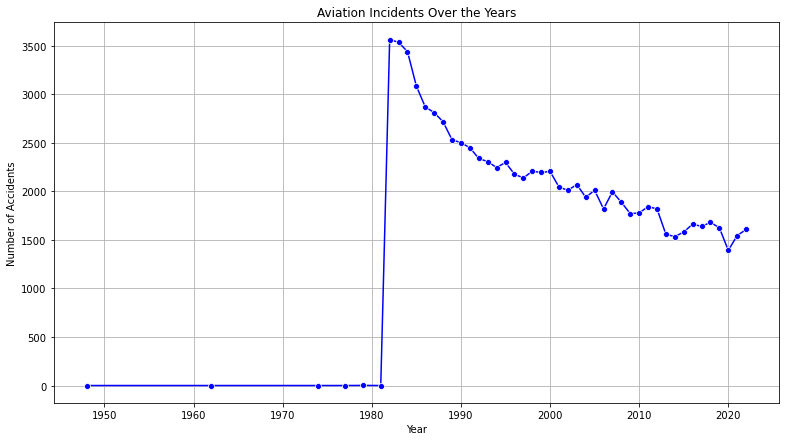

In [65]:
plt.figure(figsize=(13, 7))
accident_trend = aviation_df_clean['Year'].value_counts().sort_index()
sns.lineplot(x=accident_trend.index, y=accident_trend.values, marker="o", color="b", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Aviation Incidents Over the Years")
plt.grid(True)
plt.show()

From the plot, we can see that between `1948 and 1980`, aviation accidents were very minimal, implying that the number of accidents increased significantly from 1982, which recorded the highest number of accidents, onwards.

### 2. Aircraft Manufacturer and Model Analysis ✈️
This is a `bar plot` of Aircraft Manufacturer count against the Number of Accidents.

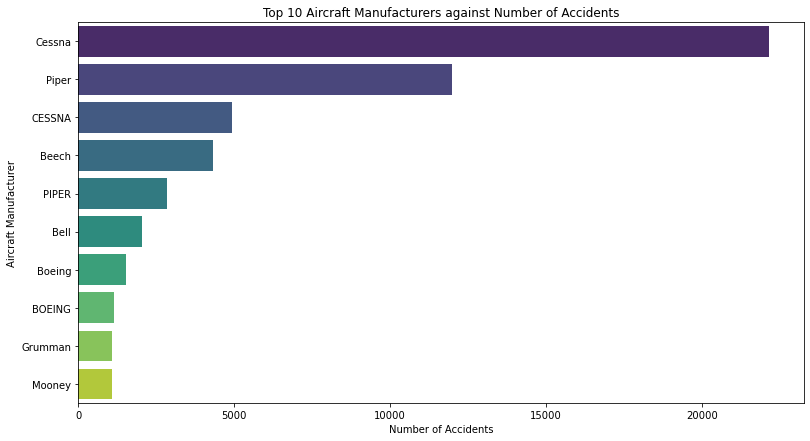

In [66]:
plt.figure(figsize=(13, 7))
top_10_aircraft_makes = aviation_df_clean['Make'].value_counts().nlargest(10) # Picks the top 10 aircraft manufacturers in the Make column
sns.barplot(x=top_10_aircraft_makes.values, y=top_10_aircraft_makes.index, palette="viridis")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Manufacturer")
plt.title("Top 10 Aircraft Manufacturers against Number of Accidents")
plt.show()

From the bar plot, we can note that the `Cessna` aircraft make had the highest number of accidents, recording over 20000 number of accidents.

### 3. Injury Severity Distribution ⚠️
This is a bar plot of Number of people against the injury type.

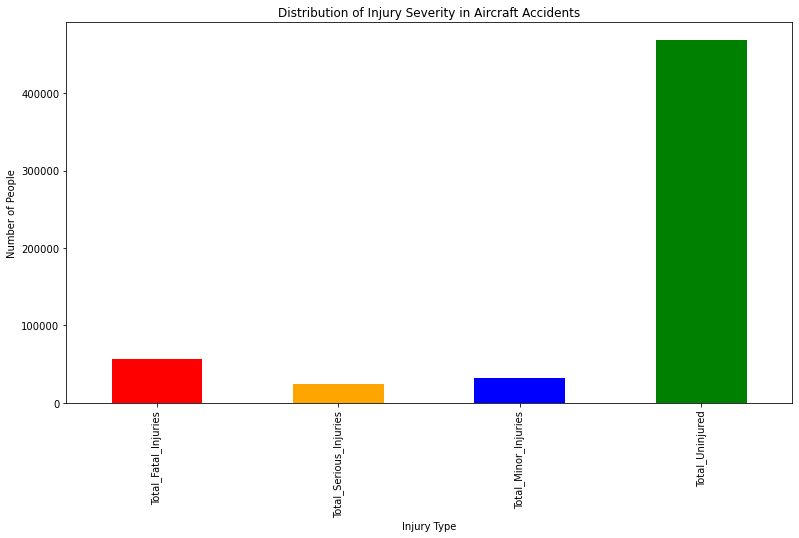

In [83]:
injury_columns = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
injury_data = aviation_df_clean[injury_columns].sum()

plt.figure(figsize=(13, 7))
injury_data.plot(kind='bar', color=['red', 'orange', 'blue', 'green'])
plt.xlabel("Injury Type")
plt.ylabel("Number of People")
plt.title("Distribution of Injury Severity in Aircraft Accidents")
plt.show()

From the plot, majority of the people were recorded as uninjured as compared to the other injury categories.

### 4. Impact of Weather Conditions ☁️
This is a count plot of Weather Condtions against the Number of accidents

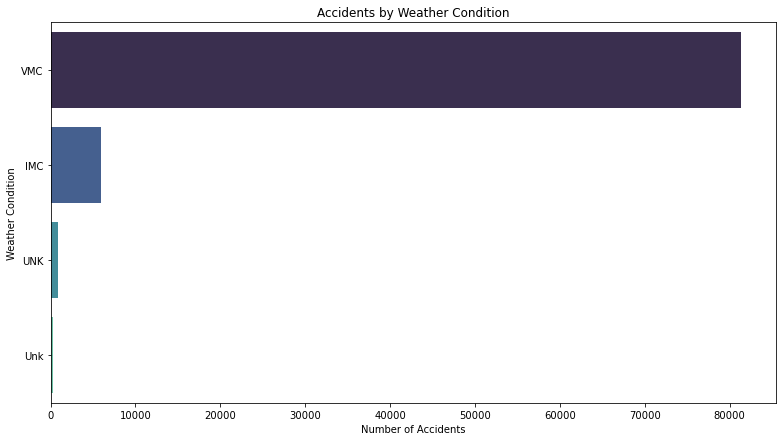

In [68]:
plt.figure(figsize=(13, 7))
sns.countplot(y=aviation_df_clean["Weather_Condition"], order=aviation_df_clean["Weather_Condition"].value_counts().index, palette="mako")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.title("Accidents by Weather Condition")
plt.show()

From the plot, `VMC` is the weather condition that caused majority of the accidents compared to the other weather conditions.

### 5. Flight Phase Risk Analysis 🚀
This is a count plot of the Phase of Flight against the Number of Accidents.


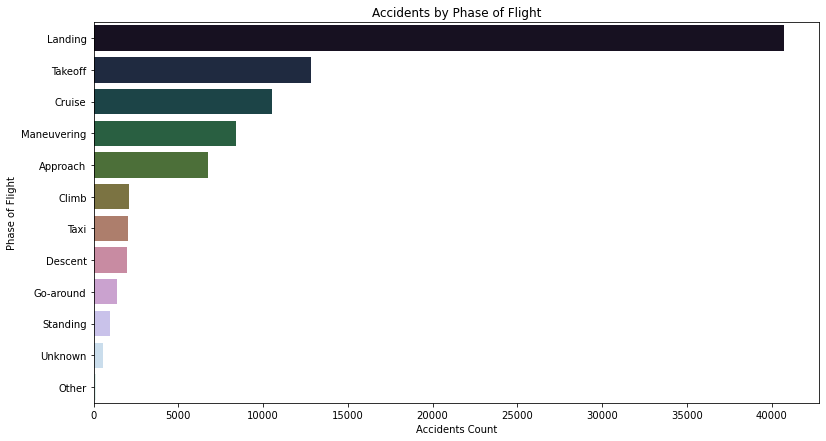

In [82]:
plt.figure(figsize=(13, 7))
sns.countplot(y=aviation_df_clean["Broad_Phase_Of_Flight"], order=aviation_df_clean["Broad_Phase_Of_Flight"].value_counts().index, palette="cubehelix")
plt.xlabel("Accidents Count")
plt.ylabel("Phase of Flight")
plt.title("Accidents by Phase of Flight")
plt.show()

From the visualization above, majority of the accidents occurred when the aircraft was landing as opposed to the other phases such as takeoff and cruise

### 6. Correlation Heatmap 🗺️
This plot will help identify relationships between several numerical features, which in this case are:
 - `Total_Fatal_Injuries`
 - `Total_Serious_Injuries`
 - `Total_Minor_Injuries`
 - `Total_Uninjured`
 - `Number_Of_Engines`

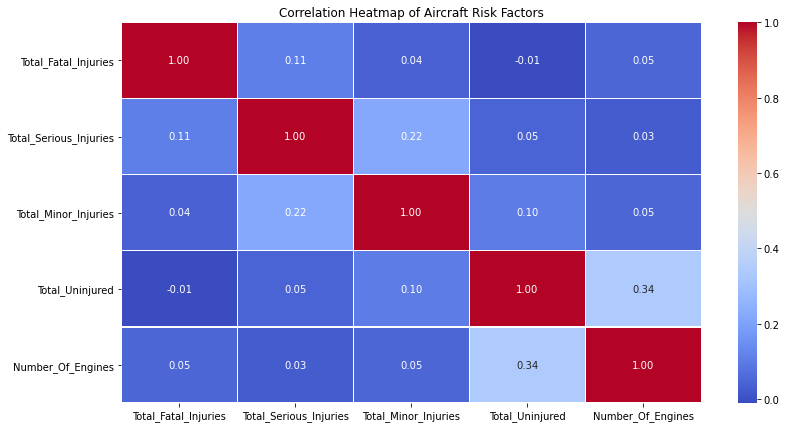

In [70]:
# Select numerical columns for correlation
numerical_cols = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Number_Of_Engines']

# Compute correlation matrix
correlation_matrix = aviation_df_clean[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(13, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Aircraft Risk Factors")
plt.show()

The heatmap helps in identifying strong positive or negative correlations, for example, whether an aircraft with more engines tends to have more or fewer accidents.

For example, looking into the heatmap, we can see that there is a very strong negative correlation between the `Total_Uninjured` and `Total_Fatal_Injuries`, implying that more uninjured passangers translates to fewer fatalities.

### 7. Aircrafts Manufacture with Flight Purpose 💼
This plot will help in comparing aircraft manufacturers based on the primary use of their aircrafts

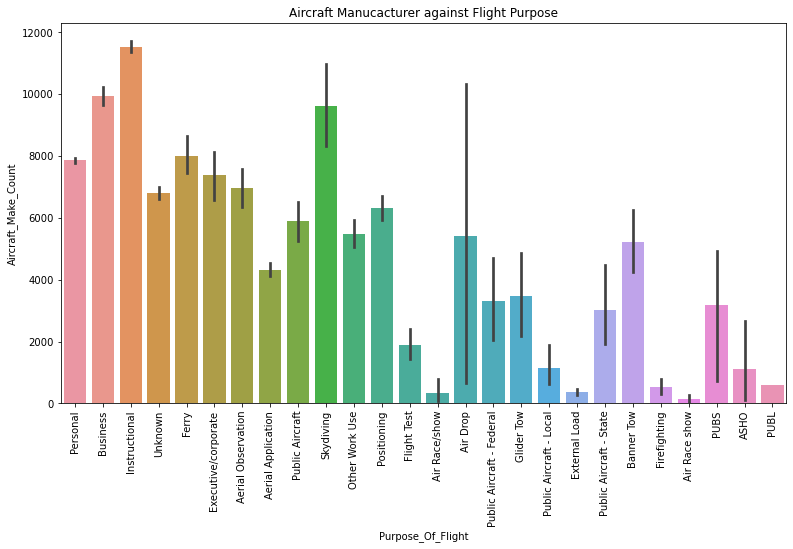

In [71]:
# Aircraft Make vs Purpose of Flight
plt.figure(figsize=(13, 7))
sns.barplot(x=aviation_df_clean['Purpose_Of_Flight'], y=aviation_df_clean['Aircraft_Make_Count'])
plt.title("Aircraft Manucacturer against Flight Purpose")
plt.xlabel("Purpose_Of_Flight")
plt.ylabel("Aircraft_Make_Count")
plt.xticks(rotation=90)
plt.show()

### 8. Aircraft Manufacturers by Number of Engines
This bar plot indicates the total aircraft manufacturers against the number of engines in an aircraft.

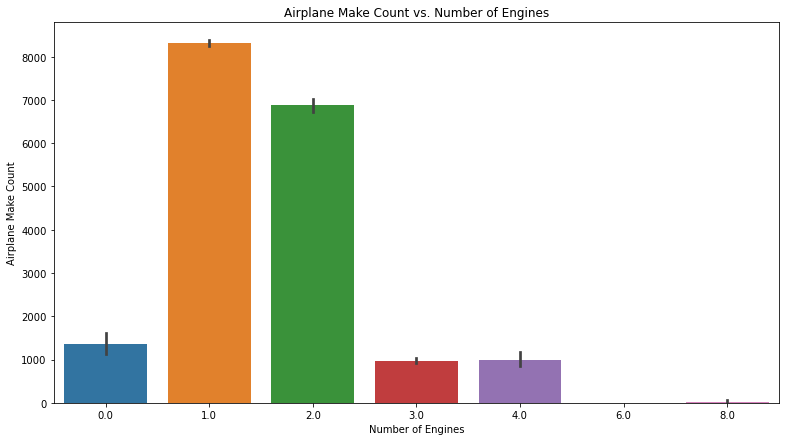

In [75]:
plt.figure(figsize=(13,7))
sns.barplot(x=aviation_df_clean['Number_Of_Engines'], y=aviation_df_clean['Aircraft_Make_Count'])
plt.xlabel("Number of Engines")
plt.ylabel("Airplane Make Count")
plt.title("Airplane Make Count vs. Number of Engines")
plt.show()

Based on this plot, we can derive that most aircraft manufacturers prefer to produce aircrafts with single engines, as opposed to multi-engine aircrafts.

### Conclusion.
This analysis provides valuable insights into the aviation accidents dataset. By visualizing the data using various plots, we can gain a deeper understanding of the frequency of accidents, the severity of injuries, the impact of weather conditions, and the relationship between various factors. By identifying patterns and trends, we can better prepare for and respond to potential accidents.

The correlation heatmap reveals strong negative correlations between the `Total_Uninjured` and `Total_Fatal_Injuries`, suggesting that more uninjured passengers might result in fewer fatalities.

Furthermore, by comparing aircraft manufacturers based on their primary use of their aircrafts, we can gain insights into the preferences and needs of different airlines. We can also see that most aircraft manufacturers prefer to produce aircrafts with single engines, which aligns with the industry standards and best practices.